# tsam - Segmentation
Example usage of the time series aggregation module (tsam)
Date: 24.10.2019

Author: Maximilian Hoffmann

Import pandas and the relevant time series aggregation class

In [1]:
%load_ext autoreload
%autoreload 2
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import tsam.timeseriesaggregation as tsam
%matplotlib inline

### Input data 

Read in time series from testdata.csv with pandas

In [2]:
raw = pd.read_csv('testdata.csv', index_col = 0)

Create a plot function for the temperature for a visual comparison of the time series

In [3]:
def plotTS(data, periodlength, vmin, vmax, label = 'T [°C]'):
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label(label)

### Hierarchical aggregation with medoid representation

Initialize an aggregation class object with hierarchical as method for eight typical days

In [22]:
aggregation = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 20, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical', segmentation=True, noSegments=12)
typPeriods = aggregation.createTypicalPeriods()

Create the typical periods

In [23]:
typPeriods = aggregation.createTypicalPeriods()

In [24]:
predictedPeriods = aggregation.predictOriginalData()

In [25]:
param = 'Wind'

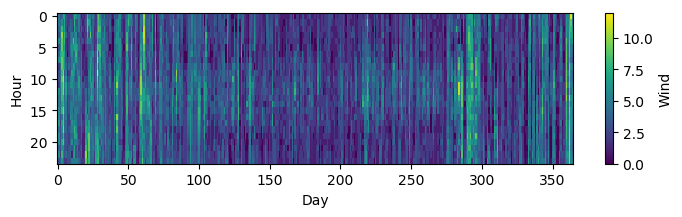

In [26]:
plotTS(raw[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

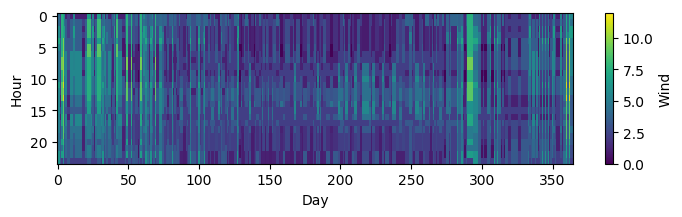

In [27]:
plotTS(predictedPeriods[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)